<a href="https://colab.research.google.com/github/XinhaoLi74/Cheminformatics-Notebooks/blob/master/Text_based_Representation_of_Chemicals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Test-Based Representation of Chemicals


In a recent [review](https://www.sciencedirect.com/science/article/pii/S1359644620300465?via%3Dihub) *Exploring chemical space using natural language processing methodologies for drug discovery*, Öztürk et.al. outlined the impact made by the advnaces in natural language processing (NLP) methodologies on drug discovery. Here is an Python implemtation of the tokenization methods discussed in the review.


## Requirements

- Conda (RDKit only supports conda install)
- RDKit 
- SELFIES [[arXiv](https://arxiv.org/abs/1905.13741)] [[Github](https://github.com/aspuru-guzik-group/selfies)]
- Huggingfase tokenizer [[Github](https://github.com/huggingface/tokenizers/tree/master/bindings/python)]

In [1]:
# install conda
!wget -c https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
!chmod +x Miniconda3-latest-Linux-x86_64.sh
!time bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local

import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2020-02-23 17:12:57--  https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.201.79, 104.18.200.79, 2606:4700::6812:c84f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.201.79|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 71785000 (68M) [application/x-sh]
Saving to: ‘Miniconda3-latest-Linux-x86_64.sh’

Miniconda3-latest-L 100%[===================>]  68.46M   189MB/s    in 0.4s    

2020-02-23 17:13:03 (189 MB/s) - ‘Miniconda3-latest-Linux-x86_64.sh’ saved [71785000/71785000]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.2.0=py37_0
    - ca-certificates==2019.10.16=0
    - certifi==2019.9.11=py37_0
    - cffi==1.13.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h7b6447c_0
  

In [2]:
# install rdkit
!conda install -c rdkit rdkit --yes

Solving environment: | / - \ | / - \ | failed with initial frozen solve. Retrying with flexible solve.
Solving environment: - \ | / - \ | / - \ | failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - rdkit


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    blas-1.0                   |              mkl           6 KB
    bzip2-1.0.8                |       h7b6447c_0          78 KB
    ca-certificates-2020.1.1   |                0         125 KB
    cairo-1.14.12              |       h8948797_3         906 KB
    certifi-2019.11.28         |           py37_0        

In [3]:
# install SELFIES 
pip install selfies

In [87]:
# install Huggingface tokenizers
pip install tokenizers

     |████████████████████████████████| 5.7MB 2.7MB/s 


## Testual Chemical Data

(1) SMILES
> SMILES is a text-based form of describing molecular structures and reactions. SMILES strings can be obtained by traversing the 2D graph representation of the compound.

(2) SELFIES
> Self-referencing embedding strings (SELFIES) is an alternative sequence-based representation that is built upon ‘semantically constrained graphs’. Each symbol in a SELFIES sequence indicates a recursive Chomsky-2 type grammar and can thus be used to convert the sequence representation to a unique graph. SELFIES use SMILES syntax to extract words that will correspond to semantically valid graphs

In [54]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
import rdkit
print(f'RDKit Version: {rdkit.__version__}')

import selfies
print(f'SELFIES Version: {selfies.__version__}')  

RDKit Version: 2019.09.3
SELFIES Version: v0.2.4


Example: Ampicillin


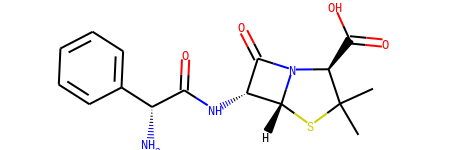

In [55]:
smiles1 = 'CC1([C@@H](N2[C@H](S1)[C@@H](C2=O)NC(=O)[C@@H](C3=CC=CC=C3)N)C(=O)O)C'
mol = Chem.MolFromSmiles(smiles1)
mol

In [56]:
selfies1 = selfies.encoder(smiles1)
selfies1

'[C][C][Branch2_3][Ring1][epsilon][C@@Hexpl][Branch2_3][epsilon][=O][N][C@Hexpl][Branch1_3][Ring2][S][Ring1][Ring2][C@@Hexpl][Branch1_3][Branch1_1][C][Ring1][Ring2][=O][N][C][Branch1_3][epsilon][=O][C@@Hexpl][Branch1_3][Branch2_2][C][=C][C][=C][C][=C][Ring1][Branch1_1][N][C][Branch1_3][epsilon][=O][O][C]'

## Identification of words and tokens

> Similar to words in natural languages, we can assume that the ‘words’ of biochemical sequences convey significant information (e.g., folding, function, etc.) about the entities. In this regard, each compound or protein is analogous to a sentence, and each compound–protein unit is analogous to a word. Therefore, Therefore, if we can decipher the grammar of biochemical languages it would be easier to model bio- and chem-informatics problems. However, protein and chemical words are not explicitly known and different approaches are needed to extract syntactically and semantically meaningful biochemical word units from these textual information sources (i.e., sequences). Here, we review some of the most common ‘tokenization’ approaches used to determine the words of biochemical languages.


### *Atom-wise tokenization*

The atom-vise tokneization is widely used in cheminformatics.


In [0]:
import re
from functools import reduce

def atomwise_tokenizer(smiles):
    regex = '(\[[^\[\]]{1,10}\])' #split the sentence with '[]'
    char_list = re.split(regex, smiles)
    tokens = []            
          
    for char in char_list:
        if char.startswith('['):
            tokens.append(str(char))
        else:
            chars = [unit for unit in char]
            [tokens.append(i) for i in chars]
                
    #fix the 'Br' be splited into 'B' and 'r'
    if 'B' in tokens:
        for index, tok in enumerate(tokens):
            if tok == 'B':
                if index < len(tokens)-1: # make sure 'B' is not the last character
                    if tokens[index+1] == 'r':
                        tokens[index: index+2] = [reduce(lambda i, j: i + j, tokens[index : index+2])]
        
    #fix the 'Cl' be splited into 'C' and 'l'
    if 'l' in tokens:
        for index, tok in enumerate(tokens):
            if tok == 'l':
                if tokens[index-1] == 'C':
                    tokens[index-1: index+1] = [reduce(lambda i, j: i + j, tokens[index-1 : index+1])]
    return tokens

In [0]:
smiles = ['CC[N+](C)(C)Cc1ccccc1Br.Cc2ccc(cc2)[S]([O-])(=O)=O',
          'CC(C)C[C@@H]1N2C(=O)[C@](NC(=O)[C@H]3CN(C)[C@@H]4Cc5c(Br)[nH]c6cccc(C4=C3)c56)(O[C@@]2(O)[C@@H]7CCCN7C1=O)C(C)C',
          'C2=C(C1C(NC(C1)=O)=O)C=CC=C2Cl']

In [0]:
tokens_smiles = []
for smi in smiles:
    tokens_smiles.append(atomwise_tokenizer(smi))

In [60]:
print(tokens_smiles[1])

['C', 'C', '(', 'C', ')', 'C', '[C@@H]', '1', 'N', '2', 'C', '(', '=', 'O', ')', '[C@]', '(', 'N', 'C', '(', '=', 'O', ')', '[C@H]', '3', 'C', 'N', '(', 'C', ')', '[C@@H]', '4', 'C', 'c', '5', 'c', '(', 'Br', ')', '[nH]', 'c', '6', 'c', 'c', 'c', 'c', '(', 'C', '4', '=', 'C', '3', ')', 'c', '5', '6', ')', '(', 'O', '[C@@]', '2', '(', 'O', ')', '[C@@H]', '7', 'C', 'C', 'C', 'N', '7', 'C', '1', '=', 'O', ')', 'C', '(', 'C', ')', 'C']


In [61]:
print(tokens_smiles[2])

['C', '2', '=', 'C', '(', 'C', '1', 'C', '(', 'N', 'C', '(', 'C', '1', ')', '=', 'O', ')', '=', 'O', ')', 'C', '=', 'C', 'C', '=', 'C', '2', 'Cl']


In [0]:
token_selfies = []
for smi in smiles:
    sel = selfies.encoder(smi)
    token_selfies.append(atomwise_tokenizer(sel))

In [63]:
print(token_selfies[1])

['[C]', '[C]', '[Branch1_3]', '[epsilon]', '[C]', '[C]', '[C@@Hexpl]', '[N]', '[C]', '[Branch1_3]', '[epsilon]', '[=O]', '[C@expl]', '[Branch2_2]', '[epsilon]', '[#C]', '[N]', '[C]', '[Branch1_3]', '[epsilon]', '[=O]', '[C@Hexpl]', '[C]', '[N]', '[Branch1_3]', '[epsilon]', '[C]', '[C@@Hexpl]', '[C]', '[c]', '[c]', '[Branch1_3]', '[epsilon]', '[Br]', '[nHexpl]', '[c]', '[c]', '[c]', '[c]', '[c]', '[Branch1_3]', '[Branch1_3]', '[C]', '[Ring1]', '[F]', '[=C]', '[Ring1]', '[#N]', '[c]', '[Ring1]', '[F]', '[Ring1]', '[Branch1_3]', '[Branch1_3]', '[=S]', '[O]', '[C@@expl]', '[Ring2]', '[epsilon]', '[Branch2_1]', '[Branch1_3]', '[epsilon]', '[O]', '[C@@Hexpl]', '[C]', '[C]', '[C]', '[N]', '[Ring1]', '[Ring2]', '[C]', '[Ring2]', '[epsilon]', '[#N]', '[=O]', '[C]', '[Branch1_3]', '[epsilon]', '[C]', '[C]']


In [64]:
print(token_selfies[2])

['[C]', '[=C]', '[Branch1_3]', '[N]', '[C]', '[C]', '[Branch1_2]', '[Branch2_2]', '[N]', '[C]', '[Branch1_2]', '[Ring2]', '[C]', '[Ring1]', '[Ring2]', '[=O]', '[=O]', '[C]', '[=C]', '[C]', '[=C]', '[Ring1]', '[O]', '[Cl]']


### *k-mers (n-grams)*
> One of the simplest approaches in NLP to extract a small
language unit is to use k-mers, also known as n-grams. k-mers indicate k consecutive **overlapping** characters that are extracted from the sequence with a sliding window approach.

The k-mers tokenization method has two parameters: the length of sub-units *k* and the *stride* between k-mers. ***Stride*** is defined as the frame shift between k-mers relative to the sequence being tokenized. 

For example, we have a sequence 'ABCDEFGH', we want to to tokenize the sequence with a k-mer size of 4 and the following stride values:
- stride 1: ABCD BCDE CDEF DEFG EFGH
- stride 2: ABCD CDEF EFGH
- stride 4: ABCD EFGH

Note: When stride > 1, it may result in the length of the last k-mer of the sequence is less than *k* and usually the last k-mer will be removed in this situation. This is not a resonable method for SMILES and SELFIES.


In [0]:
def kmer_tokenizer(smiles, ngram=4, stride=1, remove_last = False):
    units = atomwise_tokenizer(smiles) #collect all the atom-wise tokens from the SMILES
    if ngram == 1:
        tokens = units
    else: 
        tokens = [tokens_to_mer(units[i:i+ngram]) for i in range(0, len(units), stride) if len(units[i:i+ngram]) == ngram]
    
    if remove_last:
        if len(tokens[-1]) < ngram: #truncate last whole k-mer if the length of the last k-mers is less than ngram.
            tokens = tokens[:-1]
    return tokens

def tokens_to_mer(toks):
    return ''.join(toks)

In [85]:
print(kmer_tokenizer(smiles1, ngram=3))

['CC1', 'C1(', '1([C@@H]', '([C@@H](', '[C@@H](N', '(N2', 'N2[C@H]', '2[C@H](', '[C@H](S', '(S1', 'S1)', '1)[C@@H]', ')[C@@H](', '[C@@H](C', '(C2', 'C2=', '2=O', '=O)', 'O)N', ')NC', 'NC(', 'C(=', '(=O', '=O)', 'O)[C@@H]', ')[C@@H](', '[C@@H](C', '(C3', 'C3=', '3=C', '=CC', 'CC=', 'C=C', '=CC', 'CC=', 'C=C', '=C3', 'C3)', '3)N', ')N)', 'N)C', ')C(', 'C(=', '(=O', '=O)', 'O)O', ')O)', 'O)C']


In [86]:
print(kmer_tokenizer(selfies1, ngram=3))

['[C][C][Branch2_3]', '[C][Branch2_3][Ring1]', '[Branch2_3][Ring1][epsilon]', '[Ring1][epsilon][C@@Hexpl]', '[epsilon][C@@Hexpl][Branch2_3]', '[C@@Hexpl][Branch2_3][epsilon]', '[Branch2_3][epsilon][=O]', '[epsilon][=O][N]', '[=O][N][C@Hexpl]', '[N][C@Hexpl][Branch1_3]', '[C@Hexpl][Branch1_3][Ring2]', '[Branch1_3][Ring2][S]', '[Ring2][S][Ring1]', '[S][Ring1][Ring2]', '[Ring1][Ring2][C@@Hexpl]', '[Ring2][C@@Hexpl][Branch1_3]', '[C@@Hexpl][Branch1_3][Branch1_1]', '[Branch1_3][Branch1_1][C]', '[Branch1_1][C][Ring1]', '[C][Ring1][Ring2]', '[Ring1][Ring2][=O]', '[Ring2][=O][N]', '[=O][N][C]', '[N][C][Branch1_3]', '[C][Branch1_3][epsilon]', '[Branch1_3][epsilon][=O]', '[epsilon][=O][C@@Hexpl]', '[=O][C@@Hexpl][Branch1_3]', '[C@@Hexpl][Branch1_3][Branch2_2]', '[Branch1_3][Branch2_2][C]', '[Branch2_2][C][=C]', '[C][=C][C]', '[=C][C][=C]', '[C][=C][C]', '[=C][C][=C]', '[C][=C][Ring1]', '[=C][Ring1][Branch1_1]', '[Ring1][Branch1_1][N]', '[Branch1_1][N][C]', '[N][C][Branch1_3]', '[C][Branch1_3][ep

### *Longest common subsequences* and *Maximum common substructure*

These two approaches are more useful for detecting chemical similarity.



### *Minimum description length Minimum*

> Minimum description length (MDL) is an unsupervised compression-based word segmentation technique in which words of an unknown language are detected by compressing the text corpus.



### *Byte-pair encoding*

> [Byte-pair encoding (BPE)](https://www.aclweb.org/anthology/P16-1162/) generates words based on high-frequency subsequences starting from frequent characters. 

In [180]:
url = 'https://raw.githubusercontent.com/XinhaoLi74/molds/master/clean_data/ESOL.csv'

esol = pd.read_csv(url)
esol.head(1)

,smiles,logSolubility
0,N#CC(OC1OC(COC2OC(CO)C(O)C(O)C2O)C(O)C(O)C1O)c...,-0.77


In [0]:
with open('smiles_toy.smi', 'w') as filehandle:
    filehandle.writelines("%s\n" % smi for smi in esol.smiles)

In [0]:
from tokenizers import Tokenizer, models, pre_tokenizers, decoders, trainers

# Initialize a tokenizer
tokenizer = Tokenizer(models.BPE.empty())

# Customize pre-tokenization and decoding
tokenizer.pre_tokenizer = pre_tokenizers.ByteLevel(add_prefix_space=False)
tokenizer.decoder = decoders.ByteLevel()

# And then train
trainer = trainers.BpeTrainer(vocab_size=1000, min_frequency=2)

In [186]:
%%time
tokenizer.train(trainer, ['smiles_toy.smi'])

CPU times: user 13.7 ms, sys: 76 µs, total: 13.8 ms
Wall time: 16.4 ms


In [187]:
tokenizer.get_vocab_size()

171

In [188]:
for i in range(tokenizer.get_vocab_size()):
    print(i, tokenizer.id_to_token(i))

0 #
1 (
2 )
3 +
4 -
5 /
6 1
7 2
8 3
9 4
10 5
11 6
12 7
13 =
14 B
15 C
16 F
17 H
18 I
19 N
20 O
21 P
22 S
23 [
24 \
25 ]
26 c
27 l
28 n
29 o
30 r
31 s
32 Ċ
33 cc
34 CC
35 ccc
36 (=
37 Cl
38 CCCC
39 ccccc
40 CCC
41 OC
42 NC
43 )(
44 nc
45 Cc
46 cccc
47 Oc
48 Nc
49 12
50 +]
51 -]
52 )[
53 )=
54 Br
55 OCC
56 CO
57 -])
58 ([
59 Clc
60 +](=
61 (-
62 CCCCCCCC
63 21
64 nH
65 CCCCC
66 CN
67 COC
68 CCO
69 CCN
70 COc
71 SC
72 CCCCCC
73 )(=
74 cnc
75 ncc
76 +]([
77 CCOC
78 ClC
79 =[
80 CCOP
81 CNC
82 CCc
83 cccnc
84 CCCCCCC
85 oc
86 CCl
87 COP
88 Cn
89 SCC
90 NS
91 ncccc
92 Brc
93 Sc
94 CCNc
95 43
96 OCN
97 nnc
98 CCCOC
99 SP
100 CCOc
101 CCCO
102 CCCCCCCCC
103 CCCCCCCCCCCCCCCC
104 cncn
105 nccnc
106 CSC
107 CSc
108 Fc
109 ccnc
110 CCCCOC
111 ncnc
112 ccccn
113 cncnc
114 )-
115 32
116 34
117 FC
118 NCC
119 OP
120 cn
121 sc
122 ccncc
123 CCS
124 CCCl
125 CCCCO
126 CCCCc
127 CCCN
128 OCc
129 CON
130 CCCCCCCCCC
131 23
132 CBr
133 ON
134 SCCCC
135 SSC
136 occc
137 CCNC
138 CCBr
139 CCOCC
140 CCCCN
141

In [190]:
# Now we can encode
print(f'We are going to tokenize: {esol.smiles[0]}')
encoded = tokenizer.encode(esol.smiles[0])
print(f'Tokens: {encoded.tokens}')

We are going to tokenize: N#CC(OC1OC(COC2OC(CO)C(O)C(O)C2O)C(O)C(O)C1O)c1ccccc1
Tokens: ['N', '#', 'CC', '(', 'OC', '1', 'OC', '(', 'COC', '2', 'OC', '(', 'CO', ')', 'C', '(', 'O', ')', 'C', '(', 'O', ')', 'C', '2', 'O', ')', 'C', '(', 'O', ')', 'C', '(', 'O', ')', 'C', '1', 'O', ')', 'c', '1', 'ccccc', '1']
